In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 112.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.13.0 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you

In [ ]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 33.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting 

In [ ]:
import tensorflow as tf
import keras
import zipfile
from google.colab import drive
import glob
from PIL import Image
import os
import pygad
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import json
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive



--- Iteration 1/10 ---
Ant 1: {'num_layers': 2, 'neurons': [32, 32, 256, 32, 512], 'dropouts': [0.5, 0.5, 0.4, 0.2, 0.2], 'learning_rate': 0.0001, 'batch_size': 32}
 -> Validation Accuracy: 0.8589
Ant 2: {'num_layers': 3, 'neurons': [32, 512, 512, 256, 128], 'dropouts': [0.5, 0.5, 0.3, 0.6, 0.6], 'learning_rate': 0.005, 'batch_size': 32}
 -> Validation Accuracy: 0.8786
Ant 3: {'num_layers': 4, 'neurons': [512, 32, 512, 128, 64], 'dropouts': [0.2, 0.3, 0.4, 0.3, 0.4], 'learning_rate': 0.0001, 'batch_size': 32}
 -> Validation Accuracy: 0.8866
Ant 4: {'num_layers': 2, 'neurons': [256, 128, 256, 512, 64], 'dropouts': [0.3, 0.3, 0.4, 0.5, 0.3], 'learning_rate': 0.005, 'batch_size': 128}
 -> Validation Accuracy: 0.8723
Ant 5: {'num_layers': 4, 'neurons': [32, 512, 128, 32, 256], 'dropouts': [0.4, 0.3, 0.5, 0.5, 0.2], 'learning_rate': 0.0001, 'batch_size': 128}
 -> Validation Accuracy: 0.7688
Ant 6: {'num_layers': 2, 'neurons': [128, 256, 64, 512, 128], 'dropouts': [0.3, 0.3, 0.6, 0.6, 0.2],

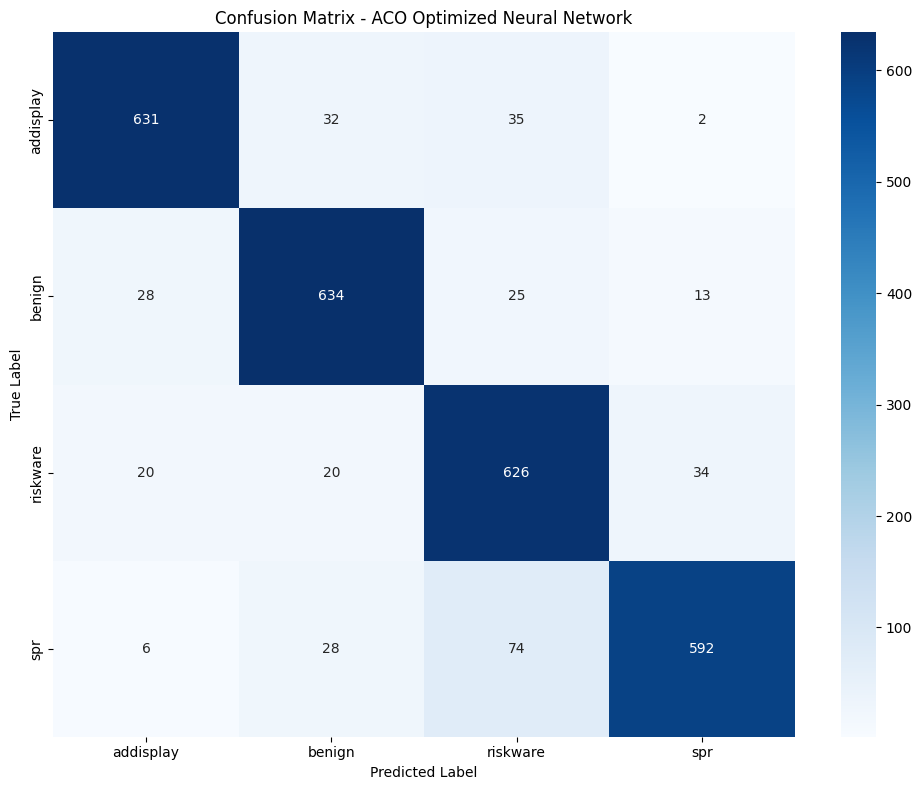

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Best model saved to /content/drive/My Drive/ACO_NN_best_model.h5
Scaler saved to /content/drive/My Drive/ACO_NN_scaler.pkl


In [ ]:
#ACO-MLP
# Load dataset
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Preprocessing
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']
# Chia dữ liệu: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Từ train_val tiếp tục chia 20% làm validation (~16% toàn bộ)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train_cat = keras.utils.to_categorical(y_train, 4)
y_val_cat = keras.utils.to_categorical(y_val, 4)
y_test_cat = keras.utils.to_categorical(y_test, 4)

# ACO for neural network architecture
class AntColonyOptimizer:
    def __init__(self, n_ants=10, n_iterations=10, evaporation_rate=0.3, alpha=1.0, beta=2.0):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta

        # Mở rộng cấu hình giống GA
        self.layer_options = [2, 3, 4, 5]
        self.neuron_options = [32, 64, 128, 256, 512]
        self.dropout_options = [0.2, 0.3, 0.4, 0.5, 0.6]
        self.lr_options = [0.0001, 0.0005, 0.001, 0.005]
        self.batch_options = [32, 64, 128, 256]

        self.pheromones = {
            'num_layers': {k: 1.0 for k in self.layer_options},
            'neurons': {k: 1.0 for k in self.neuron_options},
            'dropouts': {k: 1.0 for k in self.dropout_options},
            'learning_rate': {k: 1.0 for k in self.lr_options},
            'batch_size': {k: 1.0 for k in self.batch_options}
        }

        self.best_model = None
        self.best_accuracy = 0
        self.best_config = None

    def _choose(self, options, pheromones):
        probs = [((pheromones[opt] ** self.alpha)) for opt in options]
        probs = probs / np.sum(probs)
        return np.random.choice(options, p=probs)

    def _build_config(self):
        return {
            'num_layers': self._choose(self.layer_options, self.pheromones['num_layers']),
            'neurons': [self._choose(self.neuron_options, self.pheromones['neurons']) for _ in range(5)],
            'dropouts': [self._choose(self.dropout_options, self.pheromones['dropouts']) for _ in range(5)],
            'learning_rate': self._choose(self.lr_options, self.pheromones['learning_rate']),
            'batch_size': self._choose(self.batch_options, self.pheromones['batch_size']),
        }

    def _evaluate(self, config):
        model = keras.Sequential()
        model.add(keras.layers.Dense(config['neurons'][0], activation='relu', input_shape=(X_train.shape[1],)))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(config['dropouts'][0]))
        for i in range(1, config['num_layers']):
            model.add(keras.layers.Dense(config['neurons'][i], activation='relu'))
            model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Dropout(config['dropouts'][i]))
        model.add(keras.layers.Dense(4, activation='softmax'))

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=config['learning_rate']),
                      loss='categorical_crossentropy', metrics=['accuracy'])

        model.fit(X_train_scaled, y_train_cat, validation_data=(X_val_scaled, y_val_cat),
                  epochs=15, batch_size=config['batch_size'], verbose=0)
        _, val_acc = model.evaluate(X_val_scaled, y_val_cat, verbose=0)
        return val_acc, model

    def _update_pheromones(self, configs, accuracies):
        for param in self.pheromones:
            for k in self.pheromones[param]:
                self.pheromones[param][k] *= (1 - self.evaporation_rate)
        for config, acc in zip(configs, accuracies):
            self.pheromones['num_layers'][config['num_layers']] += acc
            self.pheromones['learning_rate'][config['learning_rate']] += acc
            self.pheromones['batch_size'][config['batch_size']] += acc
            for n in config['neurons']:
                self.pheromones['neurons'][n] += acc / config['num_layers']
            for d in config['dropouts']:
                self.pheromones['dropouts'][d] += acc / config['num_layers']

    def run(self):
        for it in range(self.n_iterations):
            print(f"\n--- Iteration {it+1}/{self.n_iterations} ---")
            configs = [self._build_config() for _ in range(self.n_ants)]
            accs = []
            for i, cfg in enumerate(configs):
                print(f"Ant {i+1}: {cfg}")
                val_acc, model = self._evaluate(cfg)
                accs.append(val_acc)
                print(f" -> Validation Accuracy: {val_acc:.4f}")
                if val_acc > self.best_accuracy:
                    self.best_accuracy = val_acc
                    self.best_model = model
                    self.best_config = cfg
            self._update_pheromones(configs, accs)
        return self.best_model, self.best_config, self.best_accuracy

# Run the ACO optimizer
aco = AntColonyOptimizer(n_ants=10, n_iterations=10)
best_model, best_config, best_acc = aco.run()

# Dự đoán nhãn từ mô hình tốt nhất
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Accuracy on Test Set: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
target_names = ['addisplay', 'benign', 'riskware', 'spr']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ACO Optimized Neural Network')
plt.tight_layout()

# Save heatmap to file
cm_path = os.path.join(base_dir, "confusion_matrix_aco_nn.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")
plt.show()

# Lưu mô hình
model_path = os.path.join(base_dir, "ACO_NN_best_model.h5")
best_model.save(model_path)
print(f"Best model saved to {model_path}")

# Lưu scaler
scaler_path = os.path.join(base_dir, "ACO_NN_scaler.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")


Class distribution:
label
0    3500
1    3500
2    3500
3    3500
Name: count, dtype: int64
Training SVM model for 4-class classification...
Validation Accuracy: 0.8875
Accuracy: 0.8757

Classification Report:
              precision    recall  f1-score   support

   addisplay       0.91      0.91      0.91       700
      benign       0.88      0.89      0.88       700
    riskware       0.82      0.86      0.84       700
         spr       0.90      0.85      0.88       700

    accuracy                           0.88      2800
   macro avg       0.88      0.88      0.88      2800
weighted avg       0.88      0.88      0.88      2800

Confusion matrix saved to /content/drive/My Drive/svm_4_confusion_matrix_t500_new.png
Model saved to /content/drive/My Drive/SVM_4_outputs_t500_new.h5
Scaler saved to /content/drive/My Drive/SVM_4_outputs_scaler_t500_new.pkl


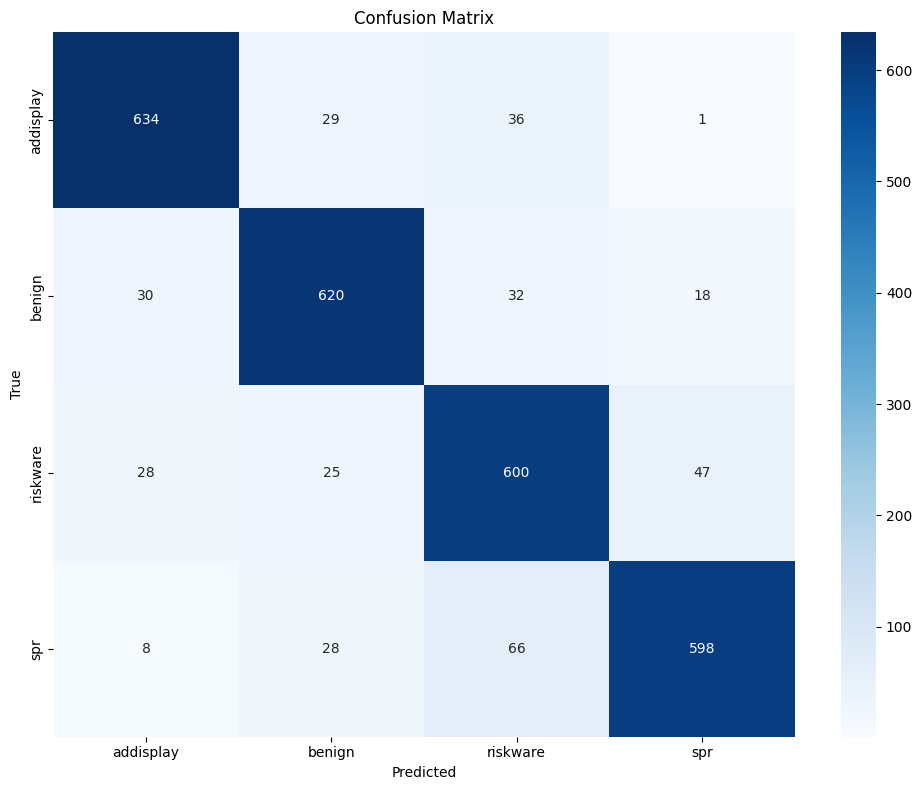

In [ ]:
# SVM new

base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Prepare the data
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Display class distribution
print("Class distribution:")
print(df['label'].value_counts())

# Chia dữ liệu: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Từ train_val tiếp tục chia 20% làm validation (~16% toàn bộ)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(
    kernel='rbf',
    C=10.0,
    gamma='auto',
    probability=True,
    class_weight='balanced',
    random_state=42
)
print("Training SVM model for 4-class classification...")
svm_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = svm_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= ['addisplay', 'benign', 'riskware', 'spr']))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
categories = ['addisplay', 'benign', 'riskware', 'spr']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(base_dir, "svm_4_confusion_matrix_t500_new.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

# Save model with .h5 extension
model_path = os.path.join(base_dir, "SVM_4_outputs_t500_new.h5")
with open(model_path, 'wb') as f:
    pickle.dump(svm_model, f)
print(f"Model saved to {model_path}")

# Save scaler
scaler_path = os.path.join(base_dir, "SVM_4_outputs_scaler_t500_new.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

Class distribution:
label
0    3500
1    3500
2    3500
3    3500
Name: count, dtype: int64
Training Random Forest model for 4-class classification...
Validation Accuracy: 0.8304
Accuracy: 0.8232

Classification Report:
              precision    recall  f1-score   support

   addisplay       0.87      0.83      0.85       700
      benign       0.78      0.93      0.85       700
    riskware       0.77      0.78      0.77       700
         spr       0.91      0.76      0.82       700

    accuracy                           0.82      2800
   macro avg       0.83      0.82      0.82      2800
weighted avg       0.83      0.82      0.82      2800

Confusion matrix saved to /content/drive/My Drive/RF_4_confusion_matrix_t500.png
Model saved to /content/drive/My Drive/RF_4_t500.h5
Scaler saved to /content/drive/My Drive/RF_4_scaler_t500.pkl


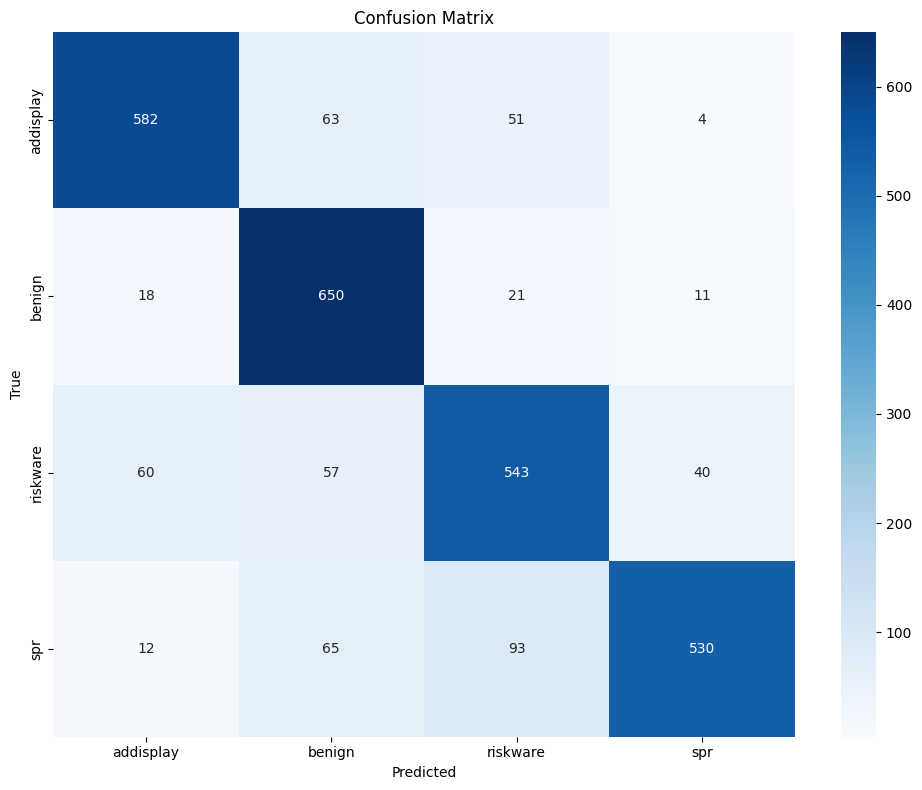

In [ ]:
# Random Forest new

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = '/content/drive/My Drive/combined_static_features_4_top500.csv'
df = pd.read_csv(csv_path)

# Prepare the data
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Display class distribution
print("Class distribution:")
print(df['label'].value_counts())

# Split into train_val (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# From train_val split 20% for validation (so ~64% train, 16% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Train the Random Forest model
model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
print("Training Random Forest model for 4-class classification...")
model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
class_names = ['addisplay', 'benign', 'riskware', 'spr']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= class_names))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Save confusion matrix
cm_path = os.path.join(base_dir, "RF_4_confusion_matrix_t500.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

# Save model with .h5 extension
model_path = os.path.join(base_dir, "RF_4_t500.h5")
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f"Model saved to {model_path}")

# Save scaler as well to ensure consistent preprocessing for inference
scaler_path = os.path.join(base_dir, "RF_4_scaler_t500.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

Train: 8960, Validation: 2240, Test: 2800

----- Training MLP Model -----
Epoch 1/45
280/280 [==============================] - 3s 5ms/step - loss: 0.8388 - accuracy: 0.6785 - val_loss: 0.4583 - val_accuracy: 0.8491
Epoch 2/45
280/280 [==============================] - 1s 4ms/step - loss: 0.4789 - accuracy: 0.8385 - val_loss: 0.4146 - val_accuracy: 0.8558
Epoch 3/45
280/280 [==============================] - 1s 4ms/step - loss: 0.4037 - accuracy: 0.8638 - val_loss: 0.3639 - val_accuracy: 0.8737
Epoch 4/45
280/280 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8752 - val_loss: 0.3858 - val_accuracy: 0.8696
Epoch 5/45
280/280 [==============================] - 1s 4ms/step - loss: 0.3212 - accuracy: 0.8917 - val_loss: 0.3661 - val_accuracy: 0.8759
Epoch 6/45
280/280 [==============================] - 1s 4ms/step - loss: 0.3083 - accuracy: 0.8960 - val_loss: 0.3690 - val_accuracy: 0.8777
Epoch 7/45
280/280 [==============================] - 1s 3ms/step - loss: 

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/MLP_4_output_t500_new.h5
Scaler saved to /content/drive/My Drive/MLP_4_output_scaler_t500_new.pkl
Training history saved to /content/drive/My Drive/training_history_MLP_t500_4_new.png


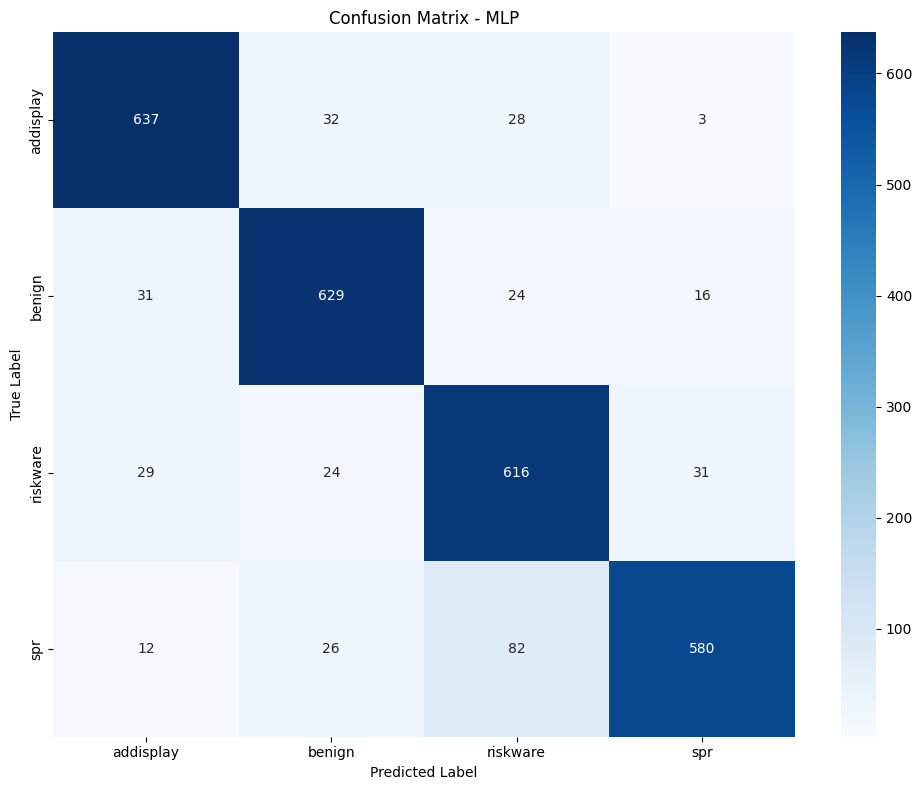

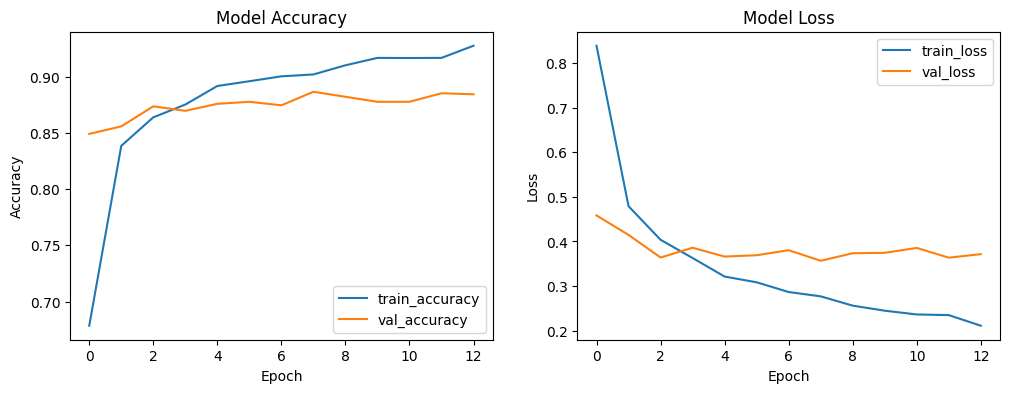

In [ ]:
# MLP new

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Split data: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# From train_val split 20% for validation (16% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

print(f"Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")
# Initialize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def train_neural_network():
    print("\n----- Training MLP Model -----")

    # One-hot encode labels
    y_train_cat = keras.utils.to_categorical(y_train, num_classes=4)
    y_val_cat = keras.utils.to_categorical(y_val, num_classes=4)
    y_test_cat = keras.utils.to_categorical(y_test, num_classes=4)

    # Create model
    input_dim = X_train.shape[1]
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_dim=input_dim),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train
    history = model.fit(
        X_train_scaled, y_train_cat,
        validation_data=(X_val_scaled, y_val_cat),
        epochs=45,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Evaluate
    loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

    # Predictions and classification report
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)
    class_names = ['addisplay', 'benign', 'riskware', 'spr']

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names= class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot Confusion Matrix using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - MLP')
    plt.tight_layout()

    # Save confusion matrix
    cm_path = os.path.join(base_dir, "confusion_matrix_mlp_t500_4_new.png")
    plt.savefig(cm_path)
    print(f"Confusion matrix saved to {cm_path}")

    # Save model (use Keras save, not pickle)
    model_path = os.path.join(base_dir, "MLP_4_output_t500_new.h5")
    model.save(model_path)
    print(f"Model saved to {model_path}")

    # Save scaler for inference
    scaler_path = os.path.join(base_dir, "MLP_4_output_scaler_t500_new.pkl")
    with open(scaler_path, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"Scaler saved to {scaler_path}")

    return model, accuracy, history

nn_model, nn_accuracy, nn_history = train_neural_network()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'], label='train_accuracy')
plt.plot(nn_history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'], label='train_loss')
plt.plot(nn_history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save training history plot
history_path = os.path.join(base_dir, "training_history_MLP_t500_4_new.png")
plt.savefig(history_path)
print(f"Training history saved to {history_path}")

Training samples: 8960, Test samples: 2800

===== Starting Genetic Algorithm for Neural Network Optimization =====
Starting Genetic Algorithm optimization for neural network...

Generation 1/15
Evaluating chromosome 1/20...
Chromosome: {'num_layers': 6, 'neurons': [128, 512, 1024, 512, 64, 64], 'dropout_rates': [0.45376054133814564, 0.4350412477322645, 0.4820547003242582, 0.3847406170186576, 0.2621709309851566, 0.5619919783445411], 'learning_rate': 0.0005, 'batch_size': 64}
Fitness (accuracy): 0.8879
Evaluating chromosome 2/20...
Chromosome: {'num_layers': 6, 'neurons': [256, 64, 256, 256, 256, 512], 'dropout_rates': [0.5690837061208949, 0.5918861216781541, 0.5591838071636277, 0.23337273076916176, 0.3165067901114122, 0.44368511982746867], 'learning_rate': 0.0001, 'batch_size': 64}
Fitness (accuracy): 0.8134
Evaluating chromosome 3/20...
Chromosome: {'num_layers': 4, 'neurons': [512, 1024, 1024, 256, 512, 512], 'dropout_rates': [0.44106663188212136, 0.33961186615391753, 0.55470595977922

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/GA_MLP_4_output_t500_final.h5
Scaler saved to /content/drive/My Drive/GA_MLP_4_output_scaler_t500_new.pkl

===== Genetic Algorithm Neural Network Training Complete =====


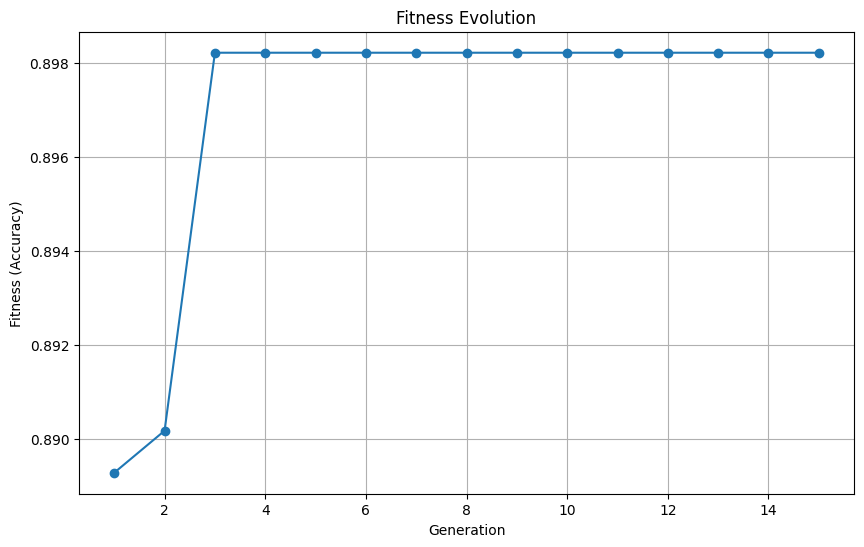

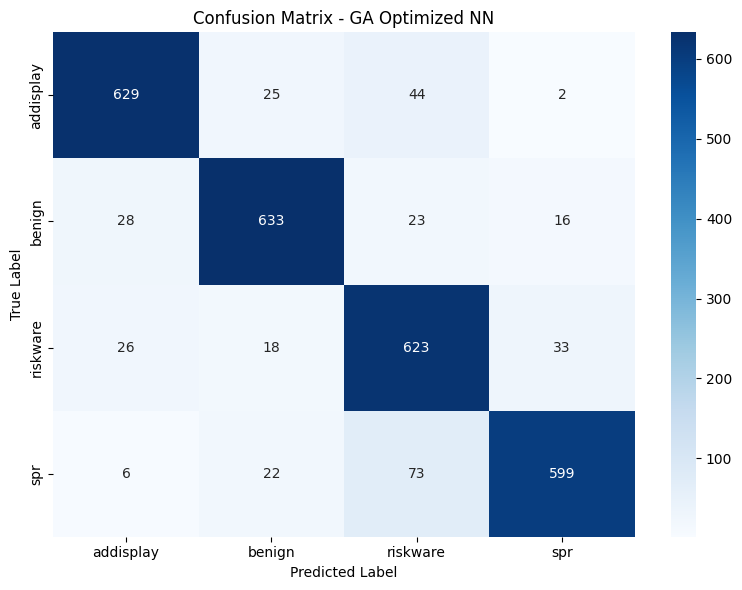

In [ ]:
# GA-MLP new

# Load the CSV file
base_dir = '/content/drive/My Drive/'
csv_path = os.path.join(base_dir, 'combined_static_features_4_top500.csv')
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(['app_id', 'category', 'label'], axis=1)
y = df['label']

# Split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# From train_val split 20% for validation => 64% train, 16% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=4)
y_val_categorical = keras.utils.to_categorical(y_val, num_classes=4)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=4)

class GeneticAlgorithm:
    def __init__(self, population_size=30, generations=15, mutation_rate=0.3, elite_size=4):
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.elite_size = elite_size
        self.chromosome_history = []
        self.fitness_history = []
        self.best_fitness = 0
        self.best_chromosome = None
        self.best_model = None
        self.best_history = None

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = {
                'num_layers': random.randint(3, 6),
                'neurons': [random.choice([64, 128, 256, 512, 1024]) for _ in range(6)],
                'dropout_rates': [random.uniform(0.2, 0.6) for _ in range(6)],
                'learning_rate': random.choice([0.0001, 0.0005, 0.001, 0.005, 0.01]),
                'batch_size': random.choice([32, 64, 128, 256])
            }
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome, verbose=0):
        num_layers = chromosome['num_layers']
        neurons = chromosome['neurons']
        dropout_rates = chromosome['dropout_rates']
        learning_rate = chromosome['learning_rate']
        batch_size = chromosome['batch_size']

        model = keras.Sequential()
        input_dim = X_train.shape[1]
        model.add(keras.layers.Dense(neurons[0], activation='relu', input_dim=input_dim))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rates[0]))

        for i in range(1, num_layers):
            model.add(keras.layers.Dense(neurons[i], activation='relu'))
            model.add(keras.layers.BatchNormalization())
            model.add(keras.layers.Dropout(dropout_rates[i]))

        model.add(keras.layers.Dense(4, activation='softmax'))  # 4 output classes

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            restore_best_weights=True
        )

        history = model.fit(
            X_train_scaled, y_train_categorical,
            validation_data=(X_val_scaled, y_val_categorical),
            epochs=30,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=verbose
        )

        _, accuracy = model.evaluate(X_val_scaled, y_val_categorical, verbose=0)
        return accuracy, model, history

    def select_parents(self, population, fitnesses):
        selected_parents = []
        elite_indices = np.argsort(fitnesses)[-self.elite_size:]
        for idx in elite_indices:
            selected_parents.append(population[idx])
        while len(selected_parents) < self.population_size:
            tournament_size = 3
            tournament_indices = random.sample(range(len(population)), tournament_size)
            tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
            winner_idx = tournament_indices[np.argmax(tournament_fitnesses)]
            selected_parents.append(population[winner_idx])
        return selected_parents

    def crossover(self, parents):
        offspring = []
        offspring.extend(parents[:self.elite_size])
        while len(offspring) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)
            child = {
                'num_layers': parent1['num_layers'] if random.random() < 0.5 else parent2['num_layers'],
                'neurons': [parent1['neurons'][i] if random.random() < 0.5 else parent2['neurons'][i] for i in range(6)],
                'dropout_rates': [parent1['dropout_rates'][i] if random.random() < 0.5 else parent2['dropout_rates'][i] for i in range(6)],
                'learning_rate': parent1['learning_rate'] if random.random() < 0.5 else parent2['learning_rate'],
                'batch_size': parent1['batch_size'] if random.random() < 0.5 else parent2['batch_size']
            }
            offspring.append(child)
        return offspring

    def mutate(self, offspring):
        for i in range(self.elite_size, len(offspring)):
            if random.random() < self.mutation_rate:
                param = random.choice(['num_layers', 'neurons', 'dropout_rates', 'learning_rate', 'batch_size'])
                if param == 'num_layers':
                    offspring[i]['num_layers'] = random.randint(3, 6)
                elif param == 'neurons':
                    idx = random.randint(0, 5)
                    offspring[i]['neurons'][idx] = random.choice([64, 128, 256, 512, 1024])
                elif param == 'dropout_rates':
                    idx = random.randint(0, 5)
                    offspring[i]['dropout_rates'][idx] = random.uniform(0.2, 0.6)
                elif param == 'learning_rate':
                    offspring[i]['learning_rate'] = random.choice([0.0001, 0.0005, 0.001, 0.005, 0.01])
                elif param == 'batch_size':
                    offspring[i]['batch_size'] = random.choice([32, 64, 128, 256])
        return offspring

    def run(self):
        print("Starting Genetic Algorithm optimization for neural network...")
        population = self.create_initial_population()
        for generation in range(self.generations):
            print(f"\nGeneration {generation+1}/{self.generations}")
            fitnesses = []
            models = []
            histories = []
            for i, chromosome in enumerate(population):
                print(f"Evaluating chromosome {i+1}/{len(population)}...")
                fitness, model, history = self.calculate_fitness(chromosome)
                fitnesses.append(fitness)
                models.append(model)
                histories.append(history)
                print(f"Chromosome: {chromosome}\nFitness (accuracy): {fitness:.4f}")
            best_idx = np.argmax(fitnesses)
            current_best_fitness = fitnesses[best_idx]
            current_best_chromosome = population[best_idx]
            if current_best_fitness > self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_chromosome = current_best_chromosome
                self.best_model = models[best_idx]
                self.best_history = histories[best_idx]

            self.chromosome_history.append(self.best_chromosome)
            self.fitness_history.append(self.best_fitness)
            print(f"Generation {generation+1} best fitness: {current_best_fitness:.4f}")
            print(f"Overall best fitness: {self.best_fitness:.4f}")
            parents = self.select_parents(population, fitnesses)
            offspring = self.crossover(parents)
            population = self.mutate(offspring)
        print("\nGenetic Algorithm completed!")
        print(f"Best chromosome: {self.best_chromosome}")
        print(f"Best fitness (accuracy): {self.best_fitness:.4f}")
        return self.best_chromosome, self.best_fitness, self.best_model

    def plot_fitness_evolution(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history, marker='o')
        plt.title('Fitness Evolution')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Accuracy)')
        plt.grid(True)
        evolution_path = os.path.join(base_dir, "ga_fitness_evolution_stronger_config.png")
        plt.savefig(evolution_path)
        print(f"Fitness evolution plot saved to {evolution_path}")

print("\n===== Starting Genetic Algorithm for Neural Network Optimization =====")
ga = GeneticAlgorithm(population_size=20, generations=15, mutation_rate=0.3, elite_size=4)
best_chromosome, best_fitness, best_model_ga = ga.run()
ga.plot_fitness_evolution()

# Evaluate model
loss, accuracy = best_model_ga.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and get labels
y_pred_prob = best_model_ga.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report
class_names = ['addisplay', 'benign', 'riskware', 'spr']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix with tick labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - GA Optimized NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
cm_path = os.path.join(base_dir, "confusion_matrix_ga_mlp_4output_t500_final.png")
plt.savefig(cm_path)
print(f"Confusion matrix saved to {cm_path}")

model_path = os.path.join(base_dir, "GA_MLP_4_output_t500_final.h5")
best_model_ga.save(model_path)
print(f"Model saved to {model_path}")

# Save scaler for inference
scaler_path = os.path.join(base_dir, "GA_MLP_4_output_scaler_t500_new.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

best_config = {
    'best_chromosome': best_chromosome,
    'best_fitness': best_fitness,
    'final_accuracy': float(accuracy)
}
with open(os.path.join(base_dir, "ga_best_configuration_4output_t500.json"), 'w') as f:
    json.dump(best_config, f, indent=4)

print("\n===== Genetic Algorithm Neural Network Training Complete =====")